# Trabajo práctico 1 



**Human activity recognition**

https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/intro_ia/tree/cohorte-6/clase_2/jupyterbooks/data

**MNIST**

    from sklearn.datasets import fetch_openml
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


Deben maximizarse la cantidad de operaciones vectorizadas en las implementaciones.


## Ejercicio 1 - Implementar clase PCA con numpy
**Dataset** Human activity recognition

Tomar las primeras 63 componentes principales y calcular la varianza contemplada. Realizar las operaciones internas con numpy.linalg. 

#### Import dataset

In [60]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['lines.color'] = 'r'
plt.style.use(['dark_background'])
      

PATH_DATASET = "./UCI HAR Dataset/train"
x_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)

print('Dataset shape: ' + str(x_train.shape))
plot = False
if plot:
    df = pd.DataFrame(data=x_train)
    plt.plot(np.mean(df), lw=2)
    plt.title('Mean')
    plt.show()
    plt.plot(np.var(df), lw=2)
    plt.title('Variance')
    plt.show()
    plt.plot(np.cumsum(np.var(df)), lw=2)
    plt.title('Cummulative Variance')
    plt.show()
    df.describe()

Dataset shape: (7352, 561)


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


#### My PCA class implementation

Dataset reduced to 63 dimensions.
Variance accumulated in those dimensions is 505.20 from the original 561.00 (90.05%).
<class 'numpy.ndarray'>
(7352, 63)


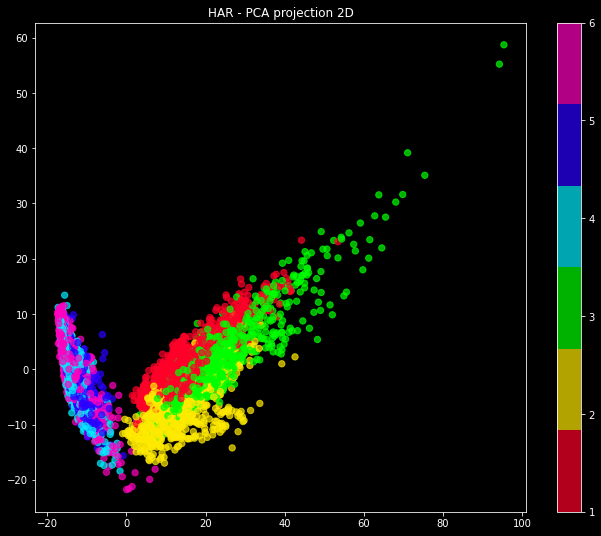

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

class MyPCA(object):
    def __init__(self, pd_dataset):
        self.df = pd_dataset
               
        # Normalize the dataset
        self.mean = np.mean(self.df, axis=0)
        self.std = np.std(self.df)
        self.var = np.var(self.df, axis=0)
        self.df_norm = (self.df - self.mean)/self.std

        # Calculate the covariance matrix
        self.cov = np.cov(self.df_norm, rowvar=False)
        
        # Compute eigenvals and eigenvectors.
        eig_val, eig_vec = np.linalg.eigh(self.cov)
        # Sort from max to min. Higher eigenvalues represent greater information in that dimension
        sort_index = np.argsort(-eig_val) # Get the indexes in descending order
        self.eig_val = eig_val[sort_index]
        self.eig_vec = eig_vec[:,sort_index]
        return
        
    # Reduce the dataset to the dimensions with the highest variance
    # @param amount If >= 1: get {amount} number of dimensions. If < 1: get the dimensions that acummulate {amount}% of the total variance
    def ReduceDim(self, amount):            
        dims_to_take = amount
        
        if(amount < 1): 
            # Get the number of dimensions needed so that {amount}% of variance is included
            acc_var = 0
            dims_to_take = 0
            target_val = amount # target value 
            cum_val = np.cumsum(self.eig_val) / np.sum(self.eig_val) # Get relative eigvalues array 
            dims_to_take = len([i for i in cum_val if i<target_val]) # Get number of dims needed to achieve target %
            dims_to_take = dims_to_take + 1 # Increase dimensions by one so that variance exceeds the desired value
            
        eig_vec_red = self.eig_vec[:,:dims_to_take] # Slice eigen vectors to the amount wanted
        self.df_red = np.dot(self.df_norm, eig_vec_red) # Compute reduced dataset

        # Show the resulting data
        var_red = np.var(self.df_red, axis=0)
        var_total = np.sum(np.var(self.df_norm))
        print('Dataset reduced to %d dimensions.' % dims_to_take)
        print('Variance accumulated in those dimensions is %.2f from the original %.2f (%.2f' % (np.sum(var_red), var_total, 100*np.sum(var_red)/var_total) + '%).')
        
        return self.df_red
        
pca = MyPCA(df)
x_pca = pca.ReduceDim(0.9)

# Graficamos los primeros dos componentes
if(True):
    plt.figure(figsize=(11,9))
    plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train, alpha=0.7, s=40, cmap=plt.cm.get_cmap('gist_rainbow', 6))
    plt.rcParams['axes.grid'] = False #Evita un warning
    plt.colorbar()
    plt.title('HAR - PCA projection 2D');

    print(type(x_pca))
    print(x_pca.shape)

## Ejercicio 2 - Implementar clase KMeans con numpy
**Dataset** Human activity recognition

Implementar kmeans con numpy. Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=2 y 6. Graficar los casos de k=2 y k=6 con las primeras dos componentes principales.

In [122]:
import random

class my_kmeans(object):
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        
    # Returns an array of distances between points and centers. points and centers must have the same dimension
    # @returns array of size [len(points), len(centers)]
    def get_distance(self, points, centers):
        assert points.shape[1] == centers.shape[1], f'argument dimensions do not match'

        distances = []
        for x in points:
            aux = []
            for c in centers:
                aux.append(np.linalg.norm(x-c))
            distances.append(aux)
        return distances
    
    # @returns list of size len(points) with the index pointing to the closest center
    def assign_clusters(self, points, centers):
        distances = self.get_distance(points, centers)
        index_to_min = np.argmin(distances,1)
        return index_to_min
    
    # Computes the geometric center of the given points
    def compute_centroid(self, points):
        return np.sum(points, axis=0)/points.shape[0]
    
    # Compute an array of centerpoints based on the points given and the assigned group
    def compute_new_centerpoints(self, points, group_id):
        retval = np.empty((self.n_clusters, points.shape[1])) # create an empty array for storing the new centerpoints
        for i in range(self.n_clusters): # for each cluster
            group = points[group_id == i]         # get the points belonging to a given cluster
            retval[i] = self.compute_centroid(group)     # compute the centroid
        
        return retval
    
    def __plot_points(self, points):
        plt.figure(figsize=(10,7))
        plt.scatter(points[:,0], points[:,1]) 
        plt.show();
    
    def fit(self, data):
        #random.seed(3)  # For reproducibility 
        c_index = random.sample(range(0, data.shape[0]), self.n_clusters)
        centers = data[c_index] # get the initial center points

        # Start iterating 
        group_id = np.empty(data.shape[0])
        for i in range(50):
            group_id = self.assign_clusters(data, centers)  # Assign the datapoints to the nearest center point
            centers = self.compute_new_centerpoints(data, group_id)
        # Store for plotting
        self.data = data
        self.groups = group_id
        return self.groups
    
    def plot(self, title):
        # Graficamos los primeros dos componentes - clusters id
        plt.figure(figsize=(11,9))
        plt.rcParams['axes.grid'] = False
        plt.scatter(self.data[:, 0], self.data[:, 1], c=self.groups, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('gist_rainbow', 6))
        plt.colorbar()
        plt.title(title);

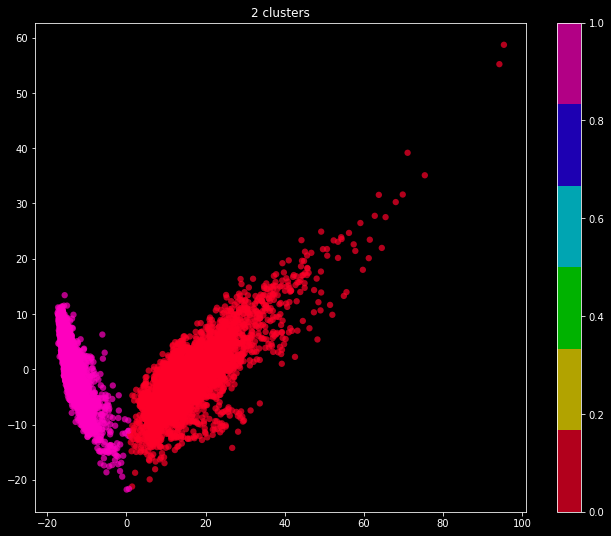

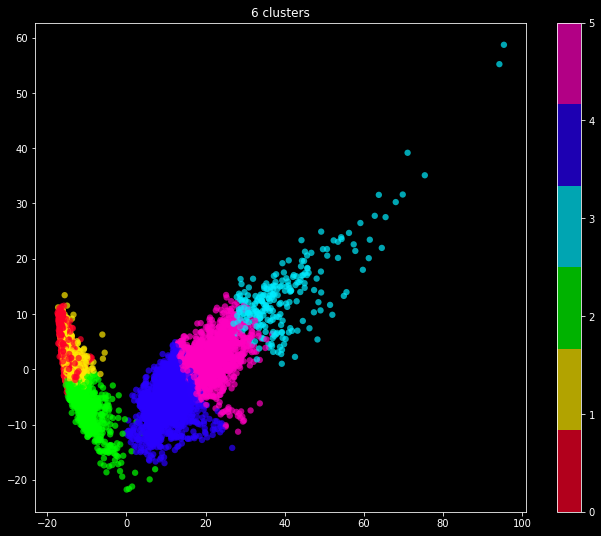

In [123]:
kmeans_2 = my_kmeans(n_clusters = 2)
groups = kmeans_2.fit(x_pca)
kmeans_2.plot('2 clusters')
kmeans_6 = my_kmeans(n_clusters = 6)
groups = kmeans_6.fit(x_pca)
kmeans_6.plot('6 clusters')

## Ejercicio 3 - Comparar los ejercicios anteriores con lo visto en las clases

##   <center> PCA
Los resultados obtenidos con mi implementación de PCA y Kmeans son semejantes a los vistos en clase utilizando la librería sklearn.

---
Mi implementación de PCA:
Luego de pedir que el PCA mantenga el 90% de la varianza original, se obtuvo un dataset de 63 dimensiones, cuya varianza acumulada fue de 505.20 (90.05% de la varianza original 561.00).
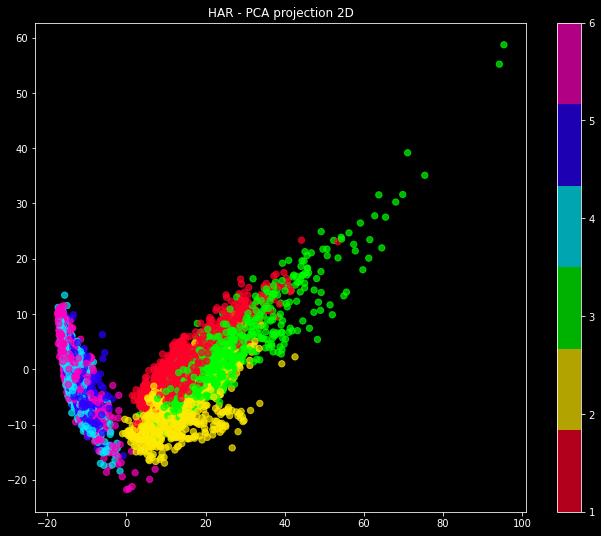
<center><i>Solo se grafican las primeras dos componentes del dataset</i></center>

---
PCA visto en clase:
El PCA de sklearn también redujo el dataset original a 63 dimensiones cuando se le solicito mantener el 90% de la varianza.
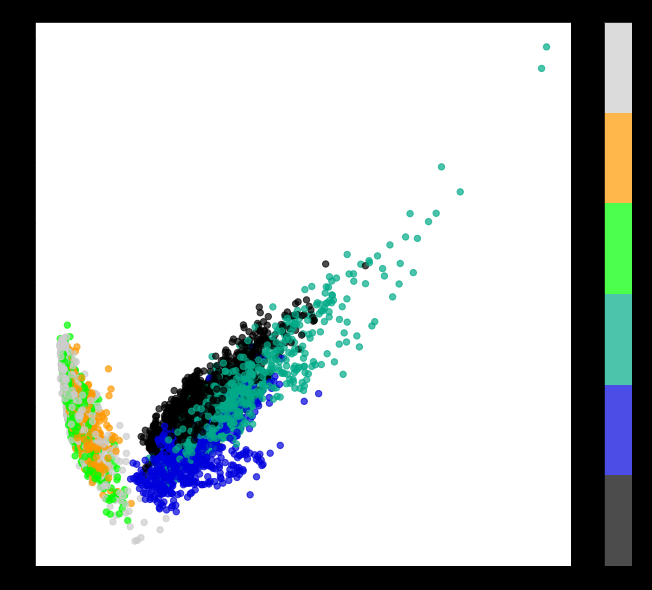
<center><i>Solo se grafican las primeras dos componentes del dataset</i></center>

---

---

---

##  <center> Kmeans

Los resultados obtenidos con mi implementación de kmenas son semejantes a los vistos en clase utilizando la librería sklearn.

---
Mi implementación de PCA:
Al pedir la clusterización en 2 y 6 clusters, el resultado obtenido fue el siguiente:
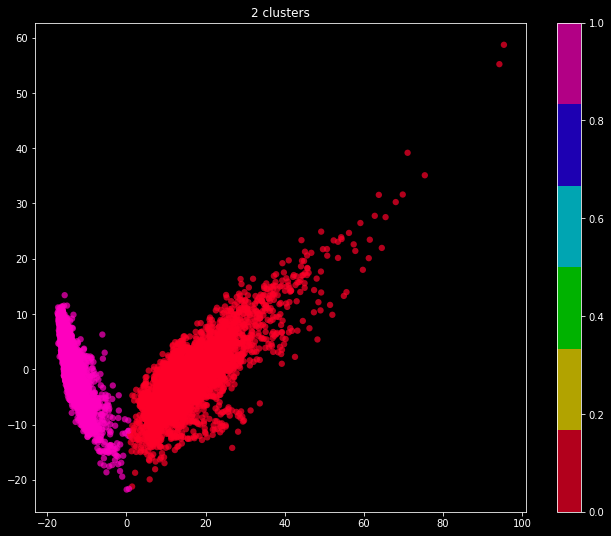
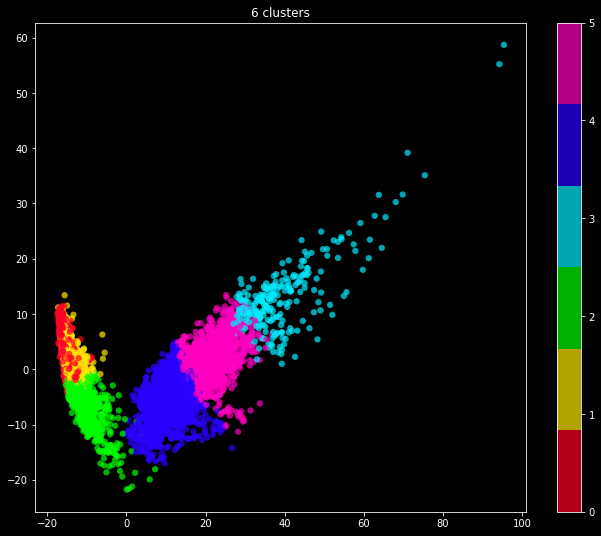
<center><i>Solo se grafican las primeras dos componentes del dataset</i></center>

Kmeans visto en clase:
Los resultados vistos en clase utilizando la implementación de kmeans de la librería sklearn son los siguientes:
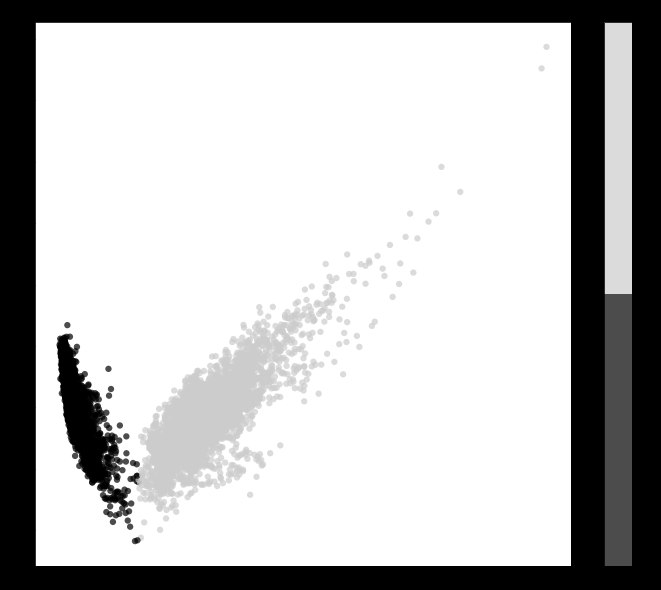
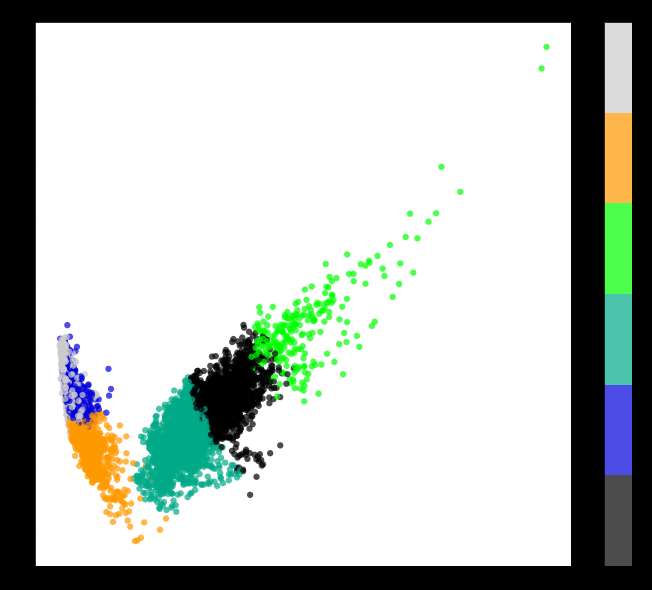
<center><i>Solo se grafican las primeras dos componentes del dataset</i></center>

## Ejercicio 4 - PCA + KMeans

**Dataset**: MNIST

Con las implementaciones de sklearn, tomar las componentes principales que capturen el 90% de la varianza y aplicar kmeans para agrupar los dígitos en 10 clusters. Analizar los resultados. 